In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Project EDA Chicago Crime Dataset

This project will have you doing exploratory data analysis in iPython on a real-world dataset. The goal is to get fluent in working with the standard tools and techniques of exploratory data analysis, by working with a dataset where you have some basic sense of familiarity.
This project is based on Chicago Crime Data available to the public. You should explore the data and uncover interesting observations. You will need to submit all your results in three different formats (.ipynb, .pdf and .py). Make sure to have your code documented with proper comments and the exact sequence of operations you needed to produce the resulting tables and figures.


This is a large dataset with many fields. Here is a list of all attributes included:
 Column Name
ID
Case Number
Date
Block
IUCR
Primary Type Description
Location Description Arrest
Domestic
Beat
District
Ward
Community Area FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Description

 This is an EDA practice, so you need to delve into the dataset and identify some useful insights and visualize them. But here are some of the key points every submission must include:
 
1. The dataset need cleaning. Decide what to do with missing values and extra attributes
2. What are some insights about the crimes and date/time? You can look into the different types of crime and their respective relationships with date: season, day of the week, day/night, etc.
3. Investigate the crime over the years. What are some interesting insights or patterns? Can you identify any specific increase/decrease?
4. Is there a relationship between the type of the crime and whether an arrest was made? How can you identify that?
5. What are some locations with high crime-rate? Have they changed throughout the years? (You can use any of the attributes indicating a location: block, ward, beat, ...)
- You can also map the data to Chicago’s city map
6. What percentage of domestic crimes ended in an arrest? Do some visualizations.
7. Come up with at least two more interesting insights and visualize them. (Suggestions: arrest/date, type of crime/location of crime, categories of different types of crime, e.g. Theft : {’500 and under’, ’over 500’, ’from building’, ’retail theft’,... } )

You must have at least one visualization for any questions/insight you are investigating.

In [2]:
import pandas as pd
import numpy as np

        
     
data_format = {'ID':'Int64' ,'Case Number':np.str_, 'Date':np.str_, 'Block':np.str_, 'IUCR':np.str_, 'Primary Type':np.str_, 
               'Description':np.str_, 'Location Description':np.str_, 'Arrest':np.bool_, 'Domestic':np.bool_, 'Beat':np.str_, 'District':np.str_, 'Ward':'Int64', 'Community Area':np.str_, 
               'FBI Code':np.str_, 'X Coordinate':'Int64', 'Y Coordinate':'Int64', 'Year':'Int64', 'Updated On':np.str_ }
data_chunks = pd.read_csv("Crimes_-_2001_to_present.csv",chunksize=1000000,dtype = data_format)# reading in 1 million rows in chunk for efficiency 

df = pd.concat(data_chunks)

df = df.drop(['Location','FBI Code','Beat','Ward','Community Area','Updated On'],axis=1)#drop columns that I don't need

df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p', exact = True)#convert the dates to a datetime data type



df.head(8)



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,004,NaN,NaN,2001,NaN,NaN
1,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,022,NaN,NaN,2017,NaN,NaN
2,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,008,NaN,NaN,2017,NaN,NaN
3,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,003,NaN,NaN,2017,NaN,NaN
4,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,001,NaN,NaN,2017,NaN,NaN
5,11227517,JB138481,2013-02-10 00:00:00,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,007,NaN,NaN,2013,NaN,NaN
6,11227503,JB146383,2015-01-01 00:01:00,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,008,NaN,NaN,2015,NaN,NaN
7,11227508,JB146365,2017-01-01 00:01:00,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,010,NaN,NaN,2017,NaN,NaN


# Explanation of Cleaning

I have dropped columns that deemed uneccessary for my EDA. These columns included ['Location','FBI Code','Beat','Ward','Community Area','Updated On']

FBI code was irrelevant to me analyzing different trends in the Chicago Crime Data set as this is a code that can be used as a foreign key to look up more information in another dataset
 
Beat, Ward , Community Area ,Updated On were extra attributes that I didn't particularly find useful to do this assignment. 

Also given that some values were not given for some columns I decided to leave them as NaN is useful as NaN doesn't get plotted during visualization. I also decided to drop columns that contain NaN values so I could focus on the dataset that have all the proper details for my analysis


In [3]:
df.info()
df.dropna(how = 'any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7085013 entries, 0 to 7085012
Data columns (total 16 columns):
ID                      Int64
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                object
X Coordinate            Int64
Y Coordinate            Int64
Year                    Int64
Latitude                float64
Longitude               float64
dtypes: Int64(4), bool(2), datetime64[ns](1), float64(2), object(7)
memory usage: 797.3+ MB


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Latitude,Longitude
63347,11665567,JC234307,2019-04-10 16:37:00,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,005,1181051,1837225,2019,41.708589,-87.612583
63431,11667968,JC237058,2019-04-19 13:57:00,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,015,1141669,1901165,2019,41.884865,-87.755230
63432,11667963,JC235212,2019-04-12 16:08:00,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,017,1147835,1921408,2019,41.940298,-87.732066
63508,11668309,JC238187,2019-04-25 17:20:00,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,005,1180832,1833222,2019,41.697609,-87.613508
63914,11692179,JC261724,2019-05-13 17:26:00,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,022,1169908,1844927,2019,41.729973,-87.653167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085005,9999999,HY189683,2015-03-18 17:08:00,043XX N CENTRAL AVE,0560,ASSAULT,SIMPLE,RESTAURANT,True,False,016,1138222,1928502,2015,41.959944,-87.767226
7085006,11700037,JC278815,2019-05-26 00:10:00,046XX W MC LEAN AVE,0460,BATTERY,SIMPLE,RESIDENCE,True,False,025,1145043,1913219,2019,41.917879,-87.742535
7085008,11700926,JC279725,2019-05-26 17:13:00,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,010,1152126,1893208,2019,41.862830,-87.717040
7085009,24560,JC279072,2019-05-26 06:48:00,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,012,1167752,1893853,2019,41.864278,-87.659660


# Insights about Crime and Date/Time

In [4]:
import matplotlib.pyplot as plt
import datetime

In [5]:
crime_time = df[['ID','Primary Type','Arrest','Description','Date','Location Description','Year']]

crime_time['Hour'] = crime_time.Date.apply(lambda row:row.hour )
crime_time['Month'] = crime_time.Date.apply(lambda row:row.month)

timeofcrime = crime_time.groupby('Hour')['Hour'].count()/len(crime_time)*100
monthofcrime = crime_time.groupby('Month')['Month'].count()/len(crime_time)*100

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] 





/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Rate of Occurence %')

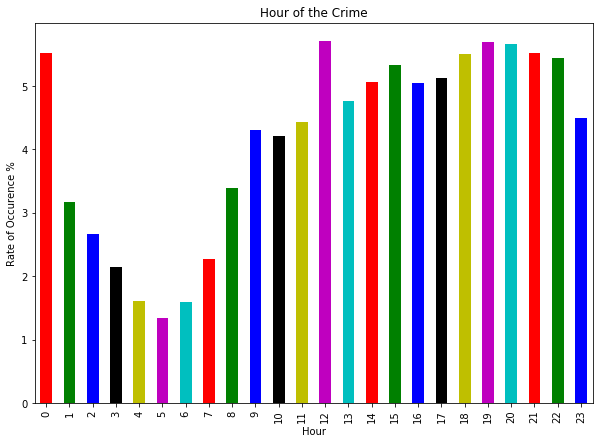

In [6]:
timeofcrime.plot(kind = 'bar',title = 'Hour of the Crime',color = my_colors,figsize=(10,7))
plt.ylabel('Rate of Occurence %')

Text(0, 0.5, 'Rate of Occurence %')

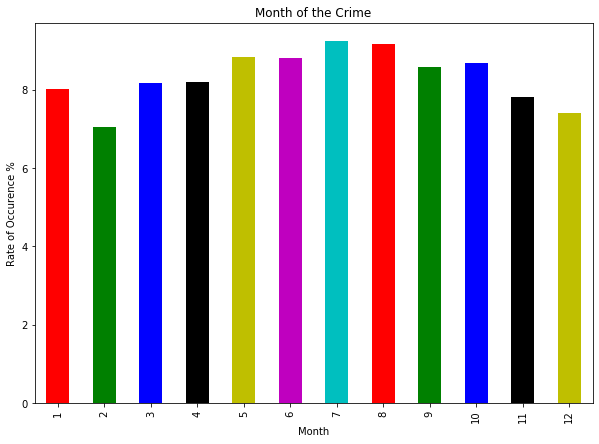

In [7]:
monthofcrime.plot(kind = 'bar',title = 'Month of the Crime',color = my_colors,figsize=(10,7))
plt.ylabel('Rate of Occurence %')

#plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12],labels = ['Jan','Feb','March','April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

I initially checked the rate of occurence of crimes according to the time and hour. This analysis gave me an idea of which season and what time during the day most of the crimes happen.As you can see from the rate of occurence in the Month graph that most of the crims happen during the time of Spring and Summer. There was a drop off in crimes when the weather is not hot. July accounts for the highest rate of occurence which gave me that people are more likely to commit a crime when the weather is better suited for them.

Although I couldn't find a good grasp on whether more crimes happend during the day or night. The rate of occurence of crimes were similar throught the day time and night time. There are a very crimes happening past midnight.Surprisingly, a lot of crimes happen during noon and towards 10,11 pm.

I first intially checked the year and the number of crimes associated with each year

Text(0.5, 0, 'Year')

Text(0.5, 0, 'Day of the Week')

Text(0.5, 0, 'Hour of the Day')

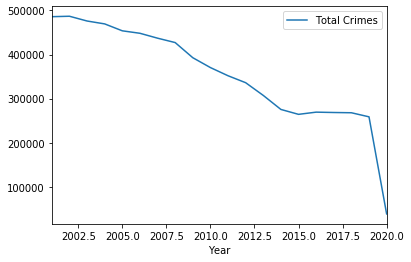

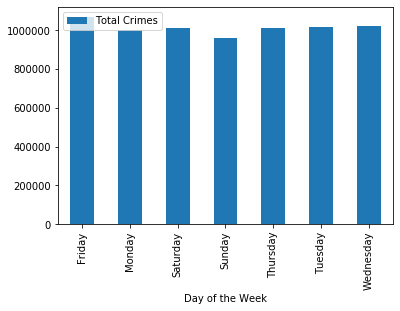

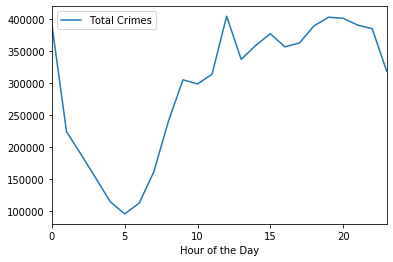

In [8]:
crime_year = df.groupby(df.Date.dt.year)['ID'].count().to_frame().rename(columns={'ID':'Total Crimes'})
crime_day = df.groupby(df.Date.dt.weekday_name)['ID'].count().to_frame().rename(columns={'ID':'Total Crimes'})
crime_time = df.groupby(df.Date.dt.hour)['ID'].count().to_frame().rename(columns={'ID':'Total Crimes'})

crime_year.plot().set_xlabel("Year")
crime_day.plot(kind='bar').set_xlabel("Day of the Week")

crime_time.plot().set_xlabel("Hour of the Day")


As you can see from the above visualization that I first found out how the crime decreased over the years. Then I checked of which days of the week the crime was the highest. Then checked the hour of the day where crimes were high or low.

As you can see from the last line graph that most of the crimes throught the years from 2001-2020 was detected around past midnight (0th hr) then some were during the middle of the day and towards the night. From 2001-2020 not a lot of crimes were happening during the hours from 1-5 (24 hr clock). 

From the second graph I made a bar graph on how the total amount of crimes on a specific day. From my visualization I was able to realize that Sunday was a low crime day. However, Friday had a highest amount of crimes. This was true from the hypothesis that I had intially

Also from my first line graph you can see the crimes have decreased from 2001-2020. There was a huge dropoff in crimes from the year of 2018-2020. The crime rate remained stable from years 2014-2017. There was a significant drop off in crimes along the years 2007-2014

In [9]:
arrested = df[(df.Arrest == True ) & (df['Primary Type']=='HOMICIDE')].groupby(['Primary Type','Year'])['ID'].count().to_frame()

ID
Primary Type Year     
HOMICIDE     2001  425
             2002  417
             2003  373
             2004  287
             2005  272
             2006  264
             2007  250
             2008  277
             2009  230
             2010  203
             2011  189
             2012  226
             2013  187
             2014  186
             2015  194
             2016  265
             2017  182
             2018  215
             2019  120
             2020   21

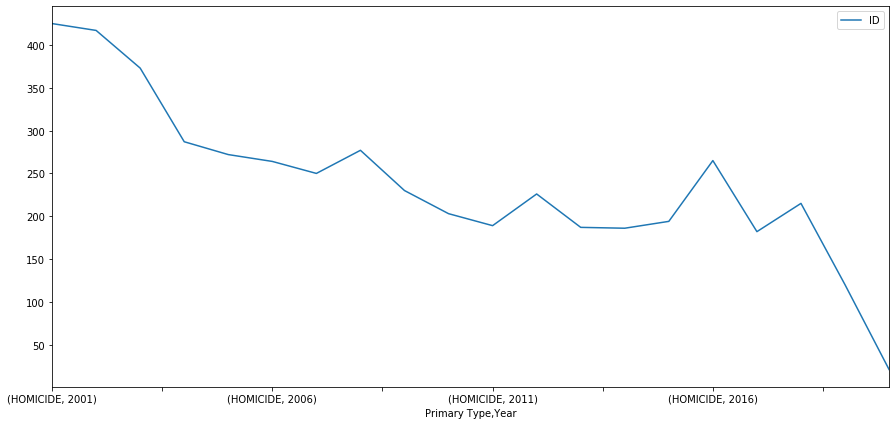

In [10]:
arrested
arrested.plot(figsize=(15,7))

One of the things I noticed is that over the years the number of Homicides that have been arrested over the year has decreased. If you look at the column below you can see from 2001 - 2019 there has been a great drop in number of Homicides. From 2018-2019 you can see the biggest drop off. However there are also some increases/decreases along the way. 

# Percentage of Domestic Crimes Ended in an Arrest

,Total Domestic,Domestic Arrested,Percentage
Year,,,
2001,58698,11274,19.206787
2002,61194,12569,20.539595
2003,53834,11486,21.335959
2004,54481,11498,21.104605
2005,50736,10419,20.535714
2006,51325,10776,20.995616
2007,50961,10954,21.494869
2008,50481,9246,18.315802
2009,53008,10690,20.166767


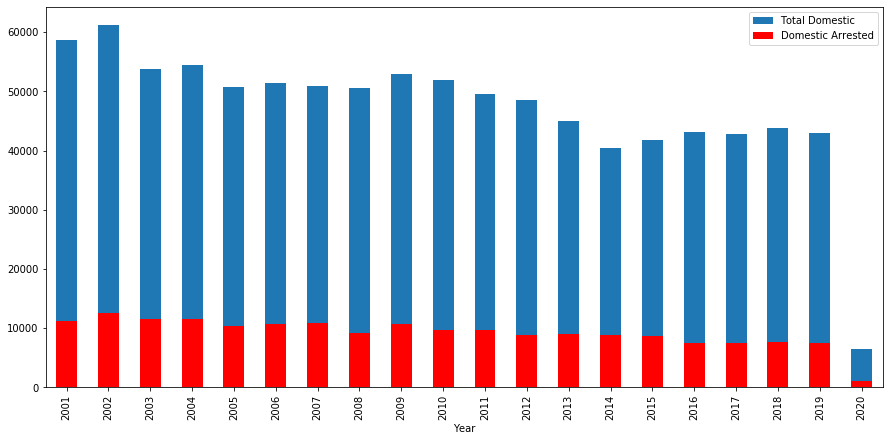

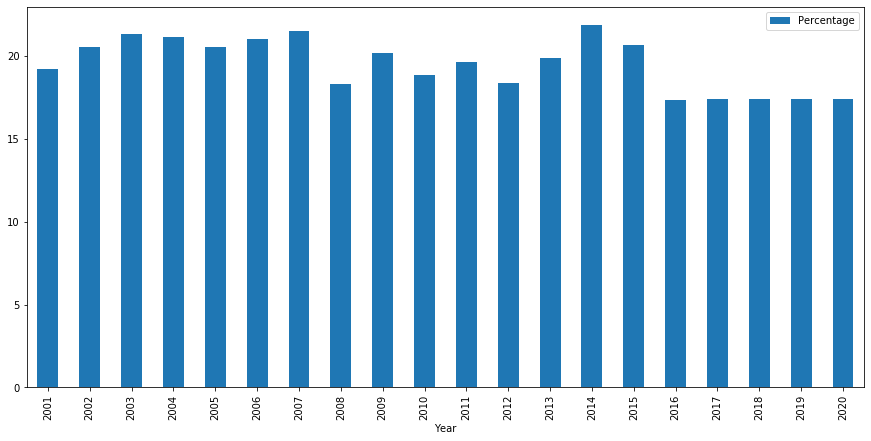

In [11]:
domestic_crimes = df[(df['Domestic']==True)].groupby('Year')['ID'].count().to_frame().rename(columns={'ID': 'Total Domestic'})

domestic_arrested = df[(df['Domestic']==True) & (df['Arrest']==True)].groupby('Year')['ID'].count().to_frame().rename(columns={'ID': 'Domestic Arrested'})
#domestic_crimes.info()
#domestic_arrested.info()

mergedDataFrame =pd.merge(left=domestic_crimes, right=domestic_arrested, left_index=True, right_index=True)

mergedDataFrame['Percentage'] = (mergedDataFrame['Domestic Arrested']/mergedDataFrame['Total Domestic'])*100

mergedDataFrame

ax = domestic_crimes.plot(kind='bar')
domestic_arrested.plot(figsize=(15,7),kind ='bar',ax = ax,color='Red',legend = ["Domestic", "Arrested"])
mergedDataFrame.plot.bar(y='Percentage', figsize=(15, 7))



I did some calculations on how many of the crimes were domestic and how many of them were arrested in the first graph.
It showed you that total amount of domestic crimes was high in 2002. Also, the total amount of crimes were lower in the year 2014.In the same graph the red section shows you the amount of arrests for those domestic crimes

The second graph represented the percentage of domestic crimes that were arrested. Although 2002 had a high amount of domestic crimes only approximated 21 percent of them ended up in an arrest. 

# Locations with High Crime Rate



I first grouped all the location descriptions and found out the top 10 locations of crimes happening in the years from 2001-2020.

From this analysis you can see the a high rate of the crimes happened in a Street, a Residence and a Sidewalk.

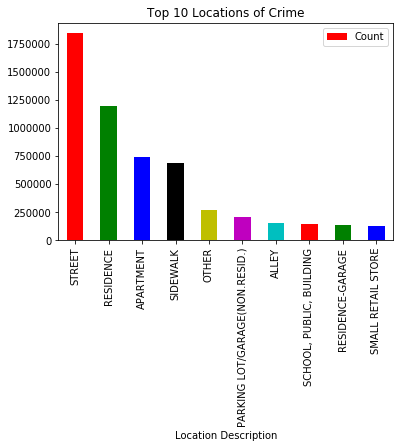

In [12]:
location_crime = df.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index()

#Top 10 crimes
location_crime[:10].plot(x='Location Description',y='Count',kind='bar',title="Top 10 Locations of Crime",color = my_colors)

7078681

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


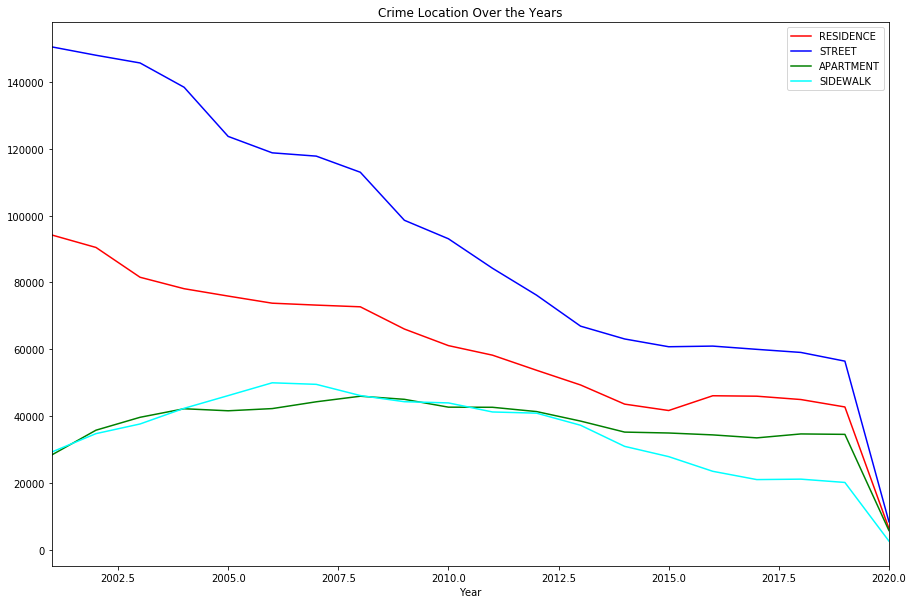

In [13]:
locations = df.groupby(['Location Description','Year'])['ID'].count().to_frame().rename(columns = {'ID':'Total Crime'})

locations['Total Crime'].sum()

newlocations = locations.pivot_table(values = 'Total Crime', columns = 'Location Description',index='Year').reset_index()

axis_1 = newlocations.plot(x='Year',y='RESIDENCE',kind ='line',colors = 'red')
axis_2 = newlocations.plot(x='Year',y='STREET',kind ='line',colors = 'blue',ax=axis_1)
axis_3 = newlocations.plot(x='Year',y='APARTMENT',kind ='line',colors = 'green',ax=axis_2)
newlocations.plot(x='Year',y='SIDEWALK',kind ='line',colors = 'cyan',ax=axis_3,title='Crime Location Over the Years',figsize = (15,10))


I also did an analysis on the top 4 locations of crime over the years. As you can see that most of the crimes have decreaseed throught these locations. However I see that the amount of crimes that happened in the sidewalk over ththe years from 2005-2007 spiked up a little. Street still dominated the total amount of crimes over the years from 2001-2020

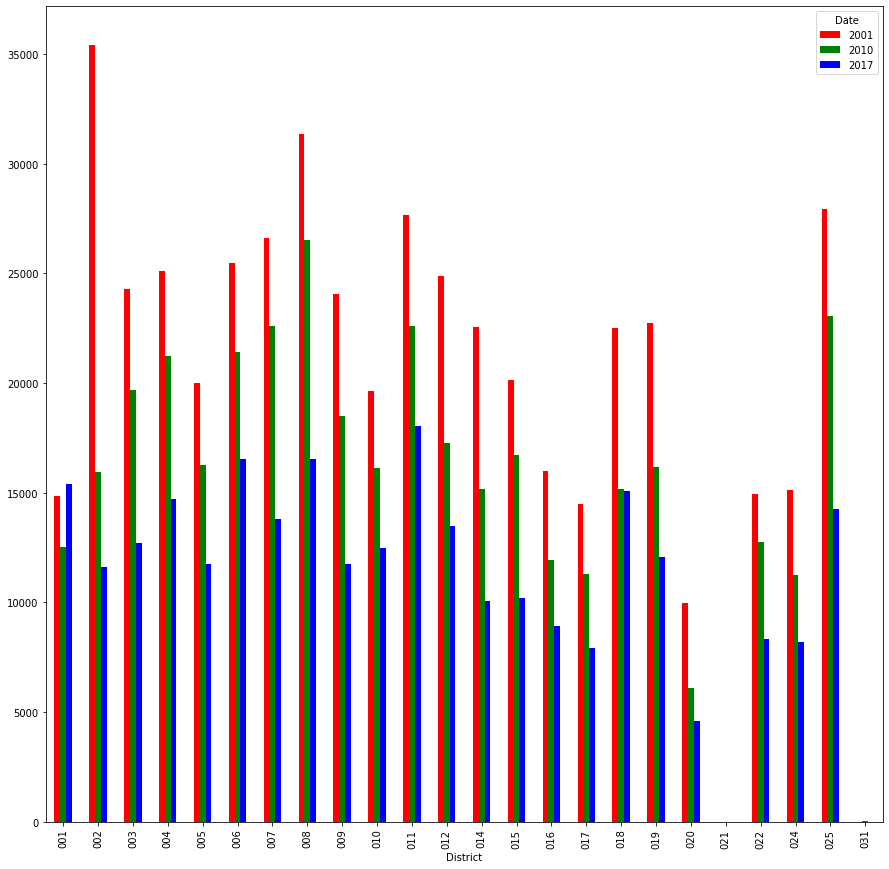

In [96]:
locationInfo = df.groupby(['District',df.Date.dt.year])['ID'].count()
locationInfo.unstack()[[2001,2010,2017]].plot(kind = 'bar',color= my_colors,figsize=(15,15))

I also checked out the crime rate in certain districts over the years. However I wanted to see if the crimes rates decreased, increased or stay the same in districts throught the years of 2001,2010,2017. 

From this graph you can see the crime rate has decreased throughout the years for all the districts. District 002 had the most amount of crimes in 2001 and District 008 had the most amount of crimes in 2010 and District 11 had the most amount of crimes in year 2017.

# Type of Crimes and Arrest


I am going to take a look at the different types of crimes and whether and arrest was made or not.

I am particularly going to look at an Homicide, Theft,etc..


In [14]:
diff_crimes = df['Primary Type'].unique().tolist()


Text(0, 0.5, 'Rate of Occurence')

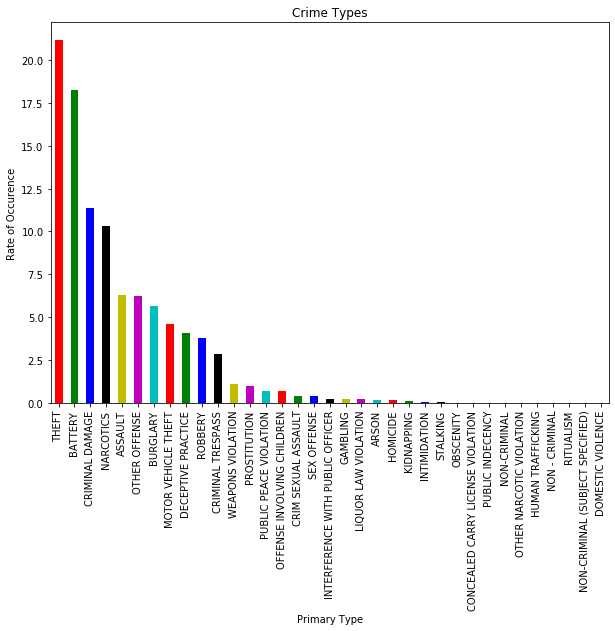

In [15]:
crime_type = df.groupby(['Primary Type'])['Primary Type'].count()/len(df)*100
crime_type.sort_values(ascending=False,inplace = True)
crime_type.plot(kind='bar',title = 'Crime Types',figsize = (10,7),color=my_colors)
plt.ylabel('Rate of Occurence')

I did some analysis on the Rate of Occurence of different types of Crimes over the year. As you can see from the visualization above most of the crime is related to Theft, Battery, and Narcotics

In [16]:
dataCrime = df[['ID','Primary Type','Arrest']]
dataCrimeCount = dataCrime[dataCrime['Primary Type'].isin(['HOMICIDE','ROBBERY','SEX OFFENSE','OFFENSE INVOLVING CHILDREN','GAMBLING','THEFT'])].groupby('Primary Type')['ID'].count()
dataCrimeStats = dataCrime[(dataCrime['Primary Type'].isin(['HOMICIDE','ROBBERY','SEX OFFENSE','OFFENSE INVOLVING CHILDREN','GAMBLING','THEFT']) & (dataCrime['Arrest'] == True))]



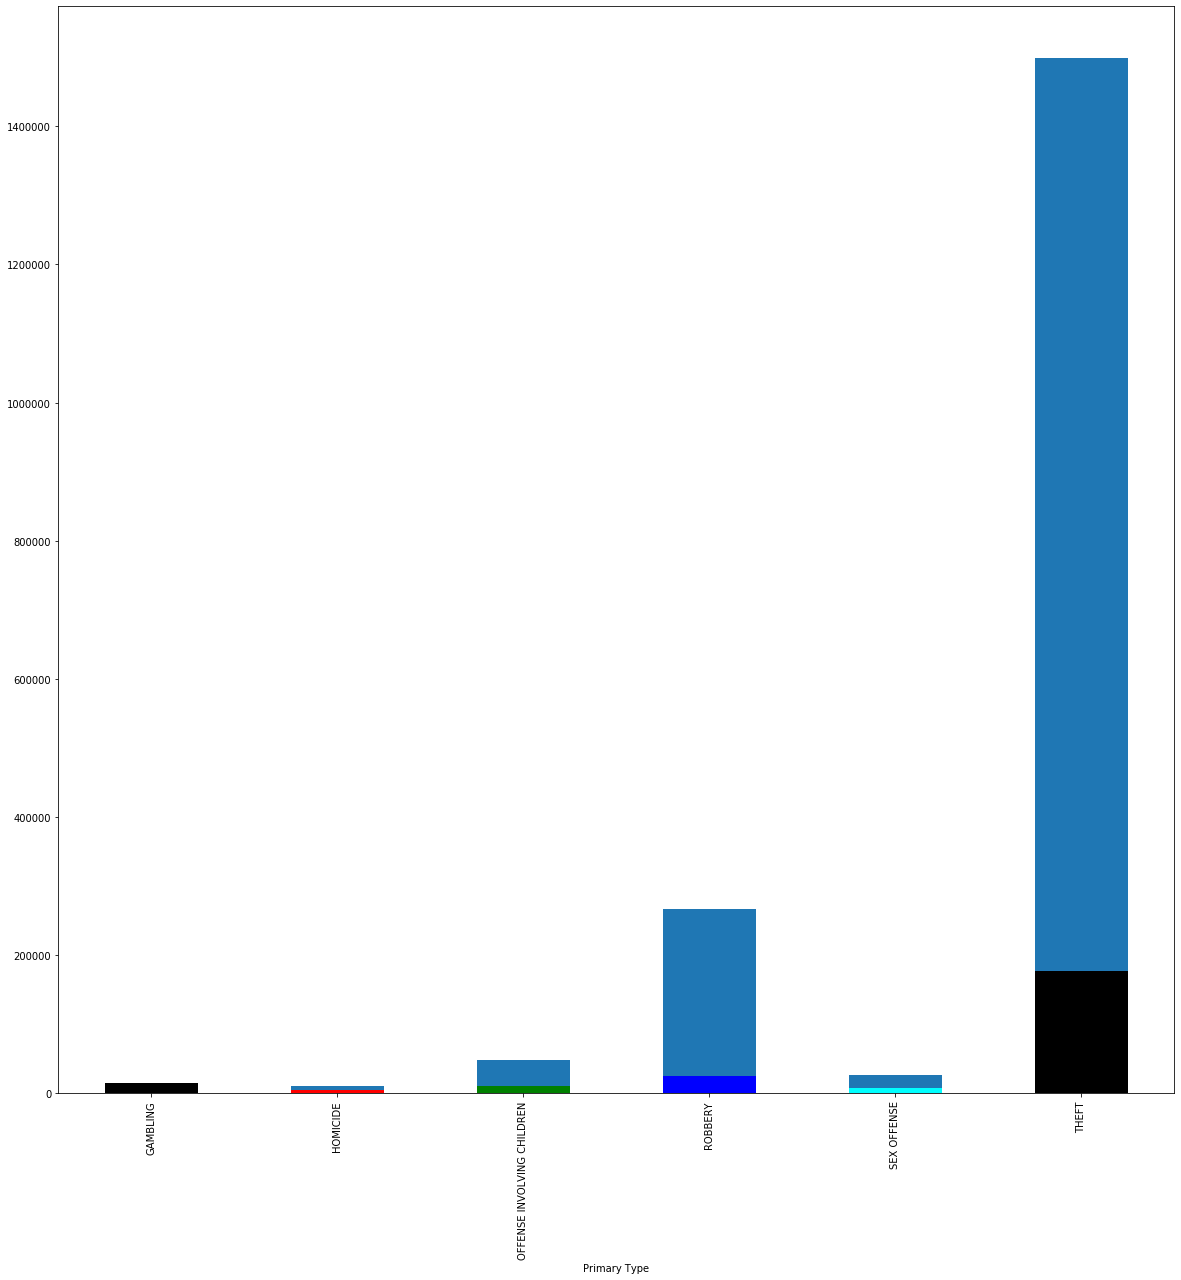

In [17]:
ax = dataCrimeCount.plot(kind = 'bar')

dataCrimeStats.groupby('Primary Type')['ID'].count().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'],ax=ax,figsize=(20,20))

I initially checked out certain crimes and tried to see whether an arrest was made. The crimes I checked were
'HOMICIDE','ROBBERY','SEX OFFENSE','OFFENSE INVOLVING CHILDREN','NON - CRIMINAL'

The sea blue represents the total amount of those crimes and the colors that overlap shows you how many of those were arrested. From this you can see that sea blue is not visible in gambling but it's completely filled up in black. This tells me from my analysis that almost all of the gambling cases ended up in an arrest. 


# Categories of Different Type of Theft Crimes

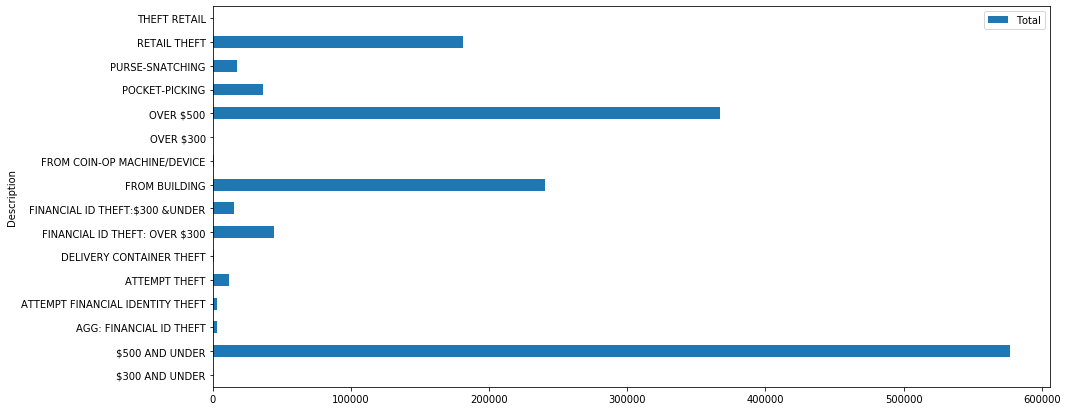

In [18]:
Info = df[['ID','Primary Type','Arrest','Description','Date','Location Description','Year']]
TheftCrimes = Info[Info['Primary Type'] == 'THEFT']

TheftCrimes.groupby('Description')['ID'].count().to_frame().rename(columns={'ID':'Total'}).plot(kind='barh',figsize=(15,7))

As you can see from the above graph.What I did was identified different descriptions of the Primary Type of crime 'THEFT' and tried to do how many of those crimes were distributed in the second description

From this analysis I can see that most of the Theft crimes were considered to be 500 and under and over 500.
I don't include Theft Retail because it is the same thing as Retail Theft. 

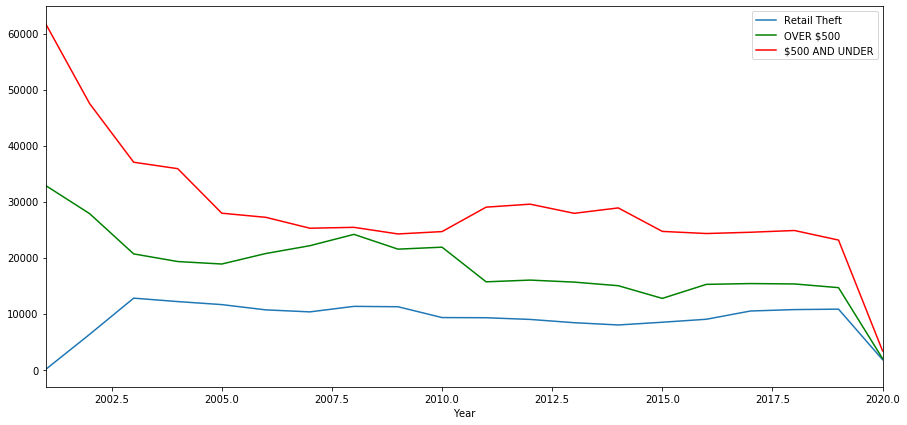

In [19]:
ax = TheftCrimes.groupby(['Description','Year'])['ID'].count().to_frame().rename(columns = {'ID':'Retail Theft'}).loc['RETAIL THEFT'].plot(kind = 'line')
ax1 = TheftCrimes.groupby(['Description','Year'])['ID'].count().to_frame().rename(columns = {'ID':'OVER $500'}).loc['OVER $500'].plot(kind = 'line',ax = ax,color='green')
TheftCrimes.groupby(['Description','Year'])['ID'].count().to_frame().rename(columns = {'ID':'$500 AND UNDER'}).loc['$500 AND UNDER'].plot(kind = 'line',ax = ax1 ,color='red',figsize=(15,7))



Next analysis I did was over certain types of Thefts. i wanted to see how those types of thefts rates changed throughout the years. As you can see from the line graph above. The crimes have substatially decreased in the years past 2017. 

Something I noticed was that all types of thefts have decreased from 2001. Although, Retail theft had a sudden increase in years 2001,2002,2003. It quickly stayed at that constant rate since then with little fluctuations. 

,Rate
Location Description,
STREET,0.002708
RESIDENCE,0.001037
OTHER,0.000567
PARKING LOT/GARAGE(NON.RESID.),0.000499
APARTMENT,0.000496
DEPARTMENT STORE,0.000494
SMALL RETAIL STORE,0.000486
GROCERY FOOD STORE,0.000394
SIDEWALK,0.000322


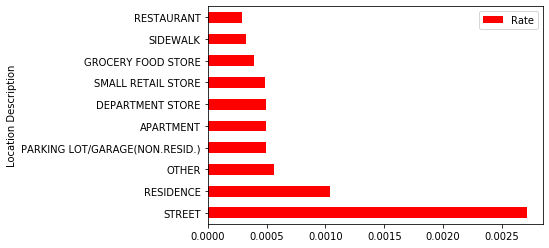

In [20]:
location=(TheftCrimes.groupby(['Location Description'])['Location Description'].count()/(len(TheftCrimes)*100)).to_frame().rename(columns = {'Location Description':'Rate'})
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
location.sort_values(by = 'Rate',ascending = False, inplace = True)
location[:10]
location[:10].plot(kind = 'barh',color = my_colors)


Next thing I tried to do was figure out where most of the theft crimes were happening. From my analyssis You can see I choose top 10 popular locations for the theft. The rate of Theft happening in the Street vs a Restaurant was much higher in the dataset. From this analysis most of the crimes were happening in a Residence or Street. 

# Crime Over the Years

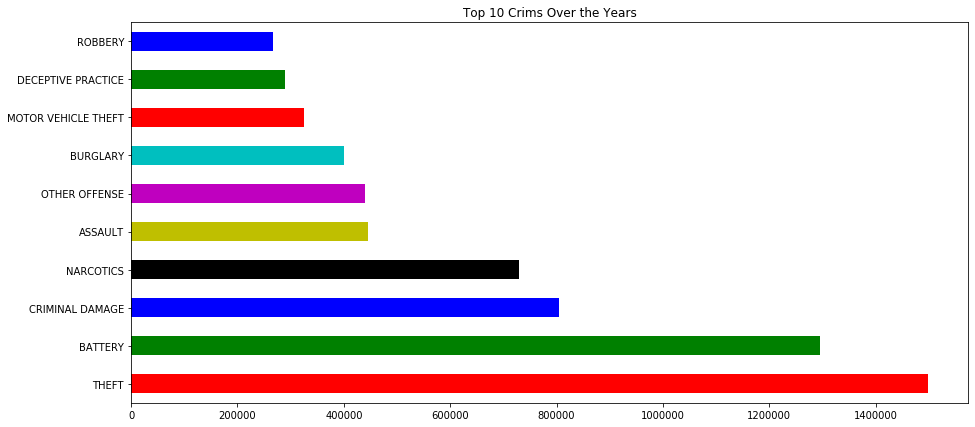

In [21]:
top_crimes = df['Primary Type'].value_counts().sort_values(ascending = False)
top_crimes[:10].plot(kind = 'barh',color=my_colors,title='Top 10 Crims Over the Years',figsize = (15,7))


I wanted to check out which crime dominated throught the span of years 2001-2020 and it was Theft and Battery that had a high rate of crime. 

Criminal Damage and Narcotics were the next two that dominated over a million crimes each of them over the years of 2001-2020.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1ace92850>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1ace92a50>,
      dtype=object)

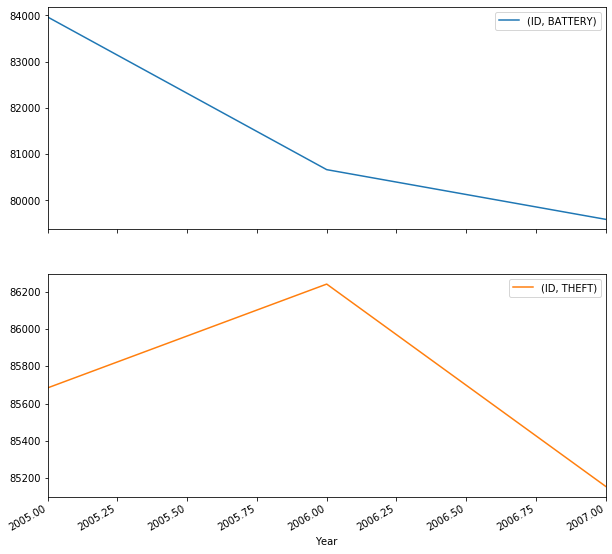

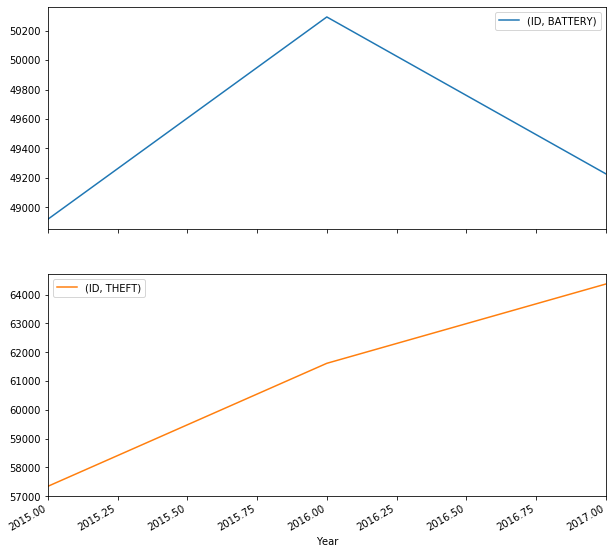

In [22]:
topcrimes = df[['Primary Type','Year','ID']]

crimeList = ['THEFT','BATTERY']

years1 = [2005,2006,2007]
years = [2015,2016,2017]

topcrimes_range1 = topcrimes[topcrimes['Primary Type'].isin(crimeList) & topcrimes['Year'].isin(years1)]
topcrimes_range2 = topcrimes[topcrimes['Primary Type'].isin(crimeList) & topcrimes['Year'].isin(years)]

theft_battery1=topcrimes_range1.groupby(['Primary Type','Year'])['ID'].count().to_frame()

theft_battery2=topcrimes_range2.groupby(['Primary Type','Year'])['ID'].count().to_frame()


theft_battery1.unstack(level=0).plot(kind='line', subplots=True,figsize=(10,10))
theft_battery2.unstack(level=0).plot(kind = 'line',subplots = True,figsize=(10,10))






I wanted to specifically check out the crimes (Battery,Theft) over the years from 2005-2007 and 2015-2017 to see if I can find a significant increase or decrease

From the subplots above from the years of 2005-2007 battery crimes went from 84,000 to 80,000. From the years of 2015-2017 there was a sudden increase of crimes that were battery but those numbers were significantly lower to the rate in the years of 2005-2007. In year 2016-2017 the battery crimes dropped significantly that was a interesting obeservation that I found


Theft crimes  over the years of 2005-2007 spiked up but initially from 2005-2006. After 2006 the theft crimes dropped to below the rate that happened in 2005. However i can't say the same about the rate of theft crimes in the years of 2015-2017. Although the intial rate of crimes happening in both ranges of years are significanly lower, it shows you that theft crimes significantly was higher in 2017 compared to 2015. 

# Arrest and Date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944366 entries, 24 to 7085009
Data columns (total 16 columns):
ID                      Int64
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                object
X Coordinate            Int64
Y Coordinate            Int64
Year                    Int64
Latitude                float64
Longitude               float64
dtypes: Int64(4), bool(2), datetime64[ns](1), float64(2), object(7)
memory usage: 233.6+ MB


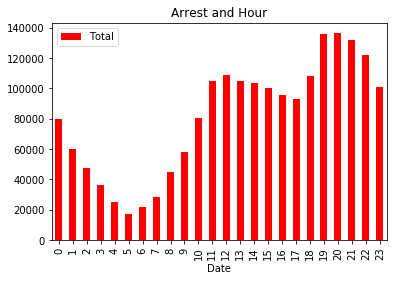

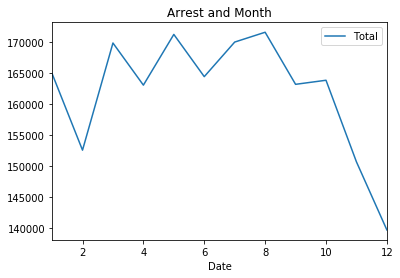

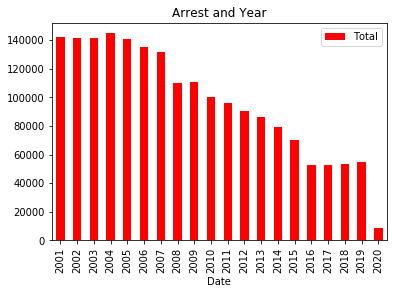

In [26]:
arrest_info = df[df.Arrest == True]
arrest_info.info()

arrest_date = arrest_info.groupby([arrest_info.Date.dt.hour])['ID'].count().to_frame().rename(columns = {'ID':'Total'})
arrest_month = arrest_info.groupby([arrest_info.Date.dt.month])['ID'].count().to_frame().rename(columns = {'ID':'Total'})
arrest_years = arrest_info.groupby([arrest_info.Date.dt.year])['ID'].count().to_frame().rename(columns = {'ID':'Total'})

arrest_date.plot(kind='bar',color = my_colors,title='Arrest and Hour')
arrest_month.plot(kind ='line',title = 'Arrest and Month')
arrest_years.plot(kind = 'bar',color = ['red','green','blue','yellow','pink','brown'],title = 'Arrest and Year')

I wanted to check the what hour usually most of the crimes offcured and you can see that from 11am - 5pm there are spike in crimes and then from 6:00pm onwards there is an increase in crime around that time over the years

Next visualization shows which Month most of the crimes have occured in. From this graph, you can see that during the summer there are a lot of crimes and arrests. Arrests are low during the fall and winter seasons.

Arrests have decreased throughout the years from the third visualization you can understand that there has been a steady decrease in crimes since 2001.

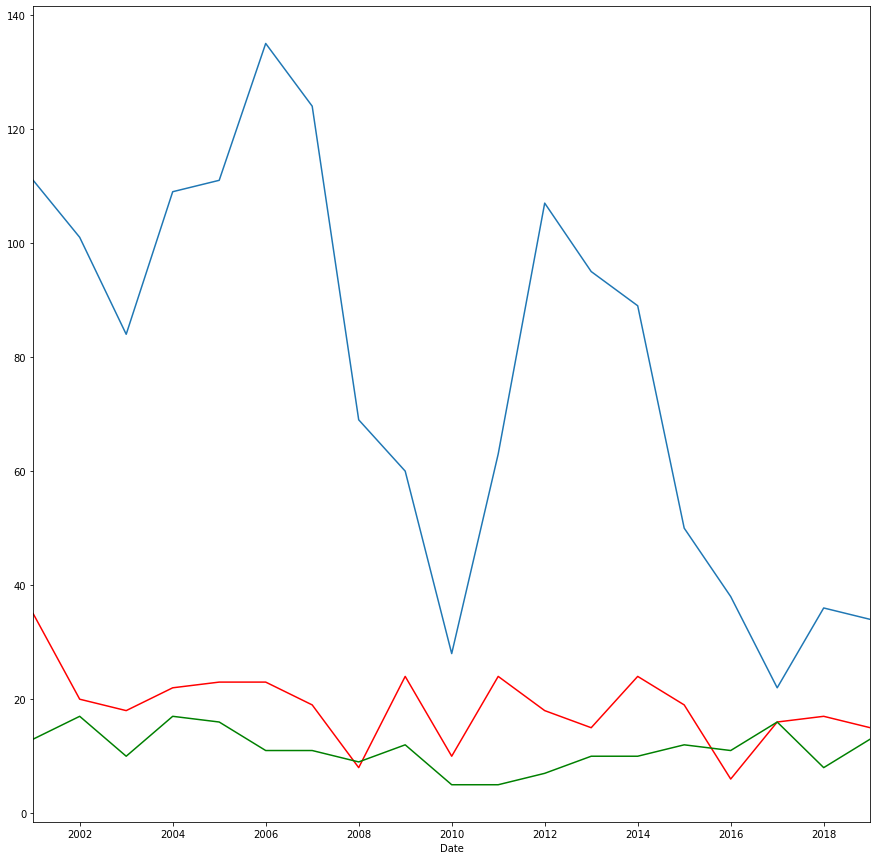

In [64]:
arrest_info2 = arrest_info[(arrest_info.Date.dt.day == 4 )&(arrest_info.Date.dt.month == 7)]
july4=arrest_info2.groupby([arrest_info2.Date.dt.year,'Primary Type'])['ID'].count()
ax = july4.unstack()['NARCOTICS'].plot()

ax2 = july4.unstack()['THEFT'].plot(ax = ax,color = 'red')

july4.unstack()['OTHER OFFENSE'].plot(ax = ax2,color = 'green',figsize = (15,15))


Well this visualization just tries to find the amount of three different types of crimes over the years during July 4th. The line with the highest count was the blue line which shows the rate of Narcotics crime during July4th. The red line shows amount of theft and the green line is other offense.

The rate of Narcotics crime was particularly high during July 4th than the highest rate of occurence crime (Theft).